This script is created for predicting the changing of Turkish lira against USD
For this purpose Linear regression and Polynomial regression has been conducted 
the sum of the Total error has been calculated until degree 100 (Line 84) 
after this calculation  the best fitted degree has been found which is number 5. 
To improve this script i will  try to figure out how to predict for the rest of the year 2020

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures

Now, we are going to add a path for our data frame and fill all the null or NAN value with the method of ffill data frame might be xlsx, csv or text file 

In [3]:
data = pd.read_excel('USD against Turkish lira.xlsx', delimiter = ',', dtype = float)

data = data.fillna(method = 'ffill')

We have two arrays: the input x and output y. You should call .reshape() on x because this array is required to be two-dimensional, or to be more precise, to have one column and as many rows as necessary. That’s exactly what the argument (-1, 1) of .reshape() specifies

In [5]:
y = np.array(data['Price'])

X= np.arange(1,263)

X = X.reshape(262,1)

y = y.reshape(262,1)

Afterward we are going to split data into the Training set and Test set,  create a linear regression model and fit it using the existing data.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lin_reg = LinearRegression()
lin_reg.fit(X, y)
Lineear_Predict =lin_reg.predict(X)

Visualizing the Linear Regression results and see how the predicted datas and real values look like

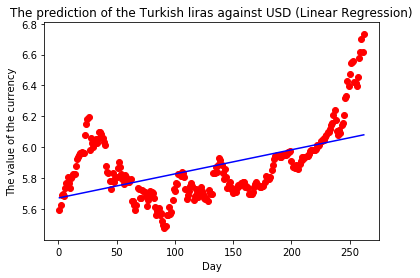

In [10]:
def Get_Linear():
    plt.scatter(X, y, color='Red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('The prediction of the Turkish liras against USD (Linear Regression)')
    plt.xlabel('Day')
    plt.ylabel('The value of the currency')
    plt.show()
    return
Get_Linear()

Let us take a look at the slop and the intercept values of the predicted line which is the blue one above. Those value can be called by using below command

In [29]:
model = LinearRegression().fit(X, y)
model.intercept_ = np.array(model.intercept_)
model.coef_ = np.array(model.coef_)
print('intercept: ', model.intercept_)
print('Slope:', model.coef_)
print('The slope function:', model.coef_,'*m +' ,model.intercept_)

intercept:  [5.6709868]
Slope: [[0.0015625]]
The slope function: [[0.0015625]] *m + [5.6709868]


We can see the linear accuracy between real valus and linear predicted values by calculating the sum of difference between real and predicted values divided up by sum of real values 

In [36]:
Linear_Accuracy = []
Linear_Error = 0
for i in range(len(X)):
      Linear_Error = Linear_Error + abs(float(y[i])-float(Lineear_Predict[i]))/100
Linear_Error = 100-Linear_Error
Linear_Accuracy.append(Linear_Error)
Linear_Error = 0

In [37]:
Linear_Accuracy

[99.60736447011571]

FITTING POLYNOMIAL REGRESSION TO THE DATASET

The same things will be calculated for polynomial regression. It can be seen that the below plot values are mostly scattered so we can increase the accuracy using polynomial regression

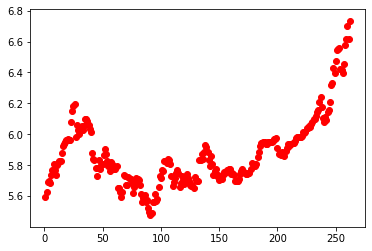

In [39]:
plt.scatter(X,y ,color ='Red')

Let us take a look at predicted polynomial curve for some degrees

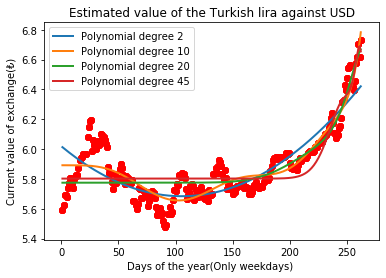

In [41]:
for i in [2,10,20,45]:
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(X)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y)
    Poly_Predict = pol_reg.predict(X_poly)
    

    plt.scatter(X, y, color='Red')
    
    plt.plot(X,pol_reg.predict(X_poly) , Linewidth = 2)
    
   
    plt.legend(["Polynomial degree 2","Polynomial degree 10","Polynomial degree 20","Polynomial degree 45"])
plt.title('Estimated value of the Turkish lira against USD')
plt.xlabel('Days of the year(Only weekdays) ')
plt.ylabel('Current value of exchange(₺)')
plt.savefig('Estimated value of the Turkish lira against the USD')
plt.show()

The fitted lines placed on the real values, and its very hard to say something about which curve is the best or which degree is the best?
In order to do this we can calculate the sum of deviation between real values and The predicted values divided up by the sum of the real values as we did for linear regression

In [42]:
polynomial_error = 0    
Total_Error =[]    
Accuracy = 0
Total_Accuracy = []

for k in range(0,100):
    poly_reg = PolynomialFeatures(degree=k+1)
    X_poly = poly_reg.fit_transform(X)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y)
    b = pol_reg.predict(X_poly)
    
    for p in range(0,len(X_poly)):
        # The sum of squares between the real currency values(y) and the predicted values(X_poly)
        polynomial_error = polynomial_error + (float(y[p])-float(pol_reg.predict(X_poly)[p]))**2
        Accuracy = Accuracy + abs(float(y[p])-float(pol_reg.predict(X_poly)[p]))/100
        
    Accuracy = 100- Accuracy
    Total_Accuracy.append(Accuracy)
    Accuracy = 0 
    # print(polinomial_error1)
    Total_Error.append(polynomial_error)
    polynomial_error = 0

In [43]:
Index = Total_Error.index(min(Total_Error))

print(f"The best polynomial degree is {Index}")

Error = Total_Error[Index]


print(f"The total error for degree {Index} is {Error}")

Accuracy_index = Total_Accuracy.index(max(Total_Accuracy))

Accuracy_value =  Total_Accuracy[Index]

print(f"The Accuracy of the system is {Accuracy_value}")

The best polynomial degree is 5
The total error for degree 5 is 1.4985596182526744
The Accuracy of the system is 99.84116160567174


Python has calculated the fitted polynomial regression degree for my real values and The accuracy is higher than the linear regression accuracy
Linear_Accuracy = 99.60736447011571 , Polynomial_Accuracy = 99.84116160567174





Let us take a look at the graph for degree five 

In [44]:
poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)
b = pol_reg.predict(X_poly)

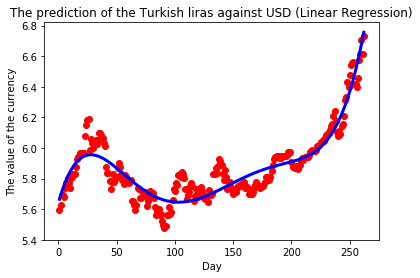

In [53]:
def Get_Polynomial():
    plt.scatter(X, y, color='Red')
    plt.plot(X, pol_reg.predict(X_poly), color='blue', Linewidth = 3)
    plt.title('The prediction of the Turkish liras against USD (Linear Regression)')
    plt.xlabel('Day')
    plt.ylabel('The value of the currency')
    plt.show()
    return
Get_Polynomial()





Thank you for your patient